In [1]:
import sys
sys.path.insert(0,"../Code/Classes")
from DataClass import DataLoader
from GaborKernelClass import GaborFeatures

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataloader = DataLoader()
dataloader.load_std_folder("../../Data/STD_Folder")
dataloader.parse_biclass()
#dataloader.extend_parsed()

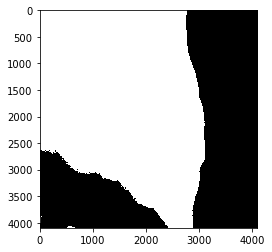

In [19]:
im_index = 78

img = dataloader.get_data("flat",[im_index])[0]#[2048:3072,2048:3072,:]

yin = dataloader.get_data("class",[im_index])[0]#[2048:3072,2048:3072,:]
y = yin.astype(int)
y = y.flatten()

plt.imshow(yin)

In [20]:
from skimage.color import rgb2hsv
h_img = rgb2hsv(img)

In [21]:
gf = GaborFeatures()

gf.add_log_kernels(64,8,5)

In [7]:
con_img = gf.convolve_kernels(h_img,["green"])[:,:,0,:]
#con_img_test = gf.convolve_kernels(t_img,["green"])[:,:,0,:]

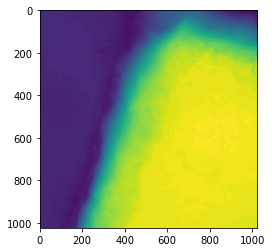

In [8]:
import cv2

dep_in = dataloader.get_data("depth",[im_index])[0]#[2048:,:2048,:]
res_dep = cv2.resize(dep_in,dsize=(4096,4096), interpolation=cv2.INTER_CUBIC)[2048:3072,2048:3072,:]
dep_v = res_dep[:,:,0]
plt.imshow(dep_v)

In [9]:
dep_prop = np.asarray([con_img[:,:,a] for a in range(con_img.shape[2])])
dep_prop = np.moveaxis(dep_prop,(0,1,2),(2,0,1))
dep_prop.shape

(1024, 1024, 80)

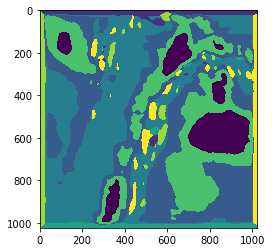

In [10]:
from sklearn.cluster import KMeans

x_size = dep_prop.shape[0]
y_size = dep_prop.shape[1]

#Adding position
#scale = 10000000
#grid = [scale*a for a in np.meshgrid(range(x_size),range(y_size))]
#grid = np.moveaxis(grid,(0,1,2),(2,0,1))

#con_img = np.append(con_img,grid,axis=2)

g_size = dep_prop.shape[2]

km = KMeans(n_clusters=8,random_state=42).fit(dep_prop.reshape(x_size*y_size, g_size))
plt.imshow(km.labels_.reshape(x_size,y_size))

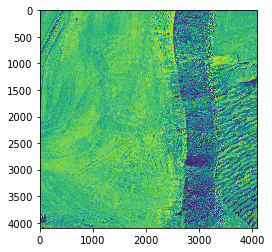

In [27]:
plt.imshow(h_img[:,:,2])